In [1]:
#Import modules
import subprocess
import sys
import os
import shutil
import matplotlib
import matplotlib.pyplot as plt

from skimage import io

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
#Paths
#enter the paths to your project dirs.
MAIN = r"E:\Seminar\Project\AttnGAN\code"
COCO = r"E:\Seminar\Project\AttnGAN\data\coco"
BIRDS = r"E:\Seminar\Project\AttnGAN\data\birds"

DATA_BIRD = r"E:\Seminar\Project\AttnGAN\models\bird_AttnGAN2\example_captions"
DATA_COCO = r"E:\Seminar\Project\AttnGAN\models\coco_AttnGAN2\example_captions"

#Commands

BIRD_CMD = "python main.py --cfg cfg/eval_bird.yml --gpu 0"
COCO_CMD = "python main.py --cfg cfg/eval_coco.yml --gpu 0"

In [3]:
#sentences for image captioninig
sentences_birds = [
    "a yellow bird with blue stomach", "a pink bird with red beak",
    "a blue bird with brown feathers",
    "a brown bird with black beak and white stomach"
]

sentence_coco = ["a pizza with lots of cheese", "an old red tv console", "a black ship"]

for i in range(len(sentence_coco)):
    sentence_coco[i] += '\n'

for i in range(len(sentences_birds)):
    sentences_birds[i] += '\n'

In [4]:
'''
subs_coco = os.listdir(DATA_COCO)
subs_birds = os.listdir(DATA_BIRD)
rows_coco = len(subs_coco)/5
rows_birds = len(subs_birds)/5
'''

'\nsubs_coco = os.listdir(DATA_COCO)\nsubs_birds = os.listdir(DATA_BIRD)\nrows_coco = len(subs_coco)/5\nrows_birds = len(subs_birds)/5\n'

In [5]:
'''
with open(BIRDS+"\\example_captions.txt", 'r+') as fopen:
    for i in sentences_birds:
        fopen.write(i)
        
with open(BIRDS+"\\example_captions.txt", 'r') as fopen:
    print(fopen.readlines())
'''

'\nwith open(BIRDS+"\\example_captions.txt", \'r+\') as fopen:\n    for i in sentences_birds:\n        fopen.write(i)\n        \nwith open(BIRDS+"\\example_captions.txt", \'r\') as fopen:\n    print(fopen.readlines())\n'

## Functions calling the Backend

In [6]:
def write_to_examples(dirname, sentences):
    '''
    write to captions file.
    dirname - dir path
    sentences - list of sentences
    '''
    with open(dirname+"\\example_captions.txt", 'w') as fopen:
        for i in sentences:
            fopen.write(i)
    fopen.close()
    print("writing done!")
    with open(dirname+"\\example_captions.txt", 'r') as fopen:
        print(fopen.readlines())
    fopen.close()

In [7]:
def plot(dirname_, sent, size=(30, 30)):
    '''
    Plotting the images
    '''
    print(sent)
    subs = os.listdir(dirname_)
    rows = len(subs) / 5
    plt.figure(figsize=size)
    for i in range(len(subs)):
        
        plt.subplot(rows, 5, i + 1)
        img = io.imread(dirname_ + "\\" + subs[i])
        plt.imshow(img)

In [8]:
def clean_dir(dirname):
    '''
    Clean the file.
    Only cleans the files, not the folders inside.
    '''
    l = os.listdir(dirname)
    for i in l:
        #shutil.rmtree(p+'\\'+i)
        try:
            os.remove(dirname + '\\' + i)
        except Exception as e:
            print(e)

# BIRDS
### Write to and call the bird model

In [9]:
clean_dir(DATA_BIRD)
write_to_examples(BIRDS, sentences=sentences_birds)
subprocess.Popen(BIRD_CMD)

writing done!
['a yellow bird with blue stomach\n', 'a pink bird with red beak\n', 'a blue bird with brown feathers\n', 'a brown bird with black beak and white stomach\n']


### Plot the Bird Generated Images

['a yellow bird with blue stomach\n', 'a pink bird with red beak\n', 'a blue bird with brown feathers\n', 'a brown bird with black beak and white stomach\n']


<IPython.core.display.Javascript object>


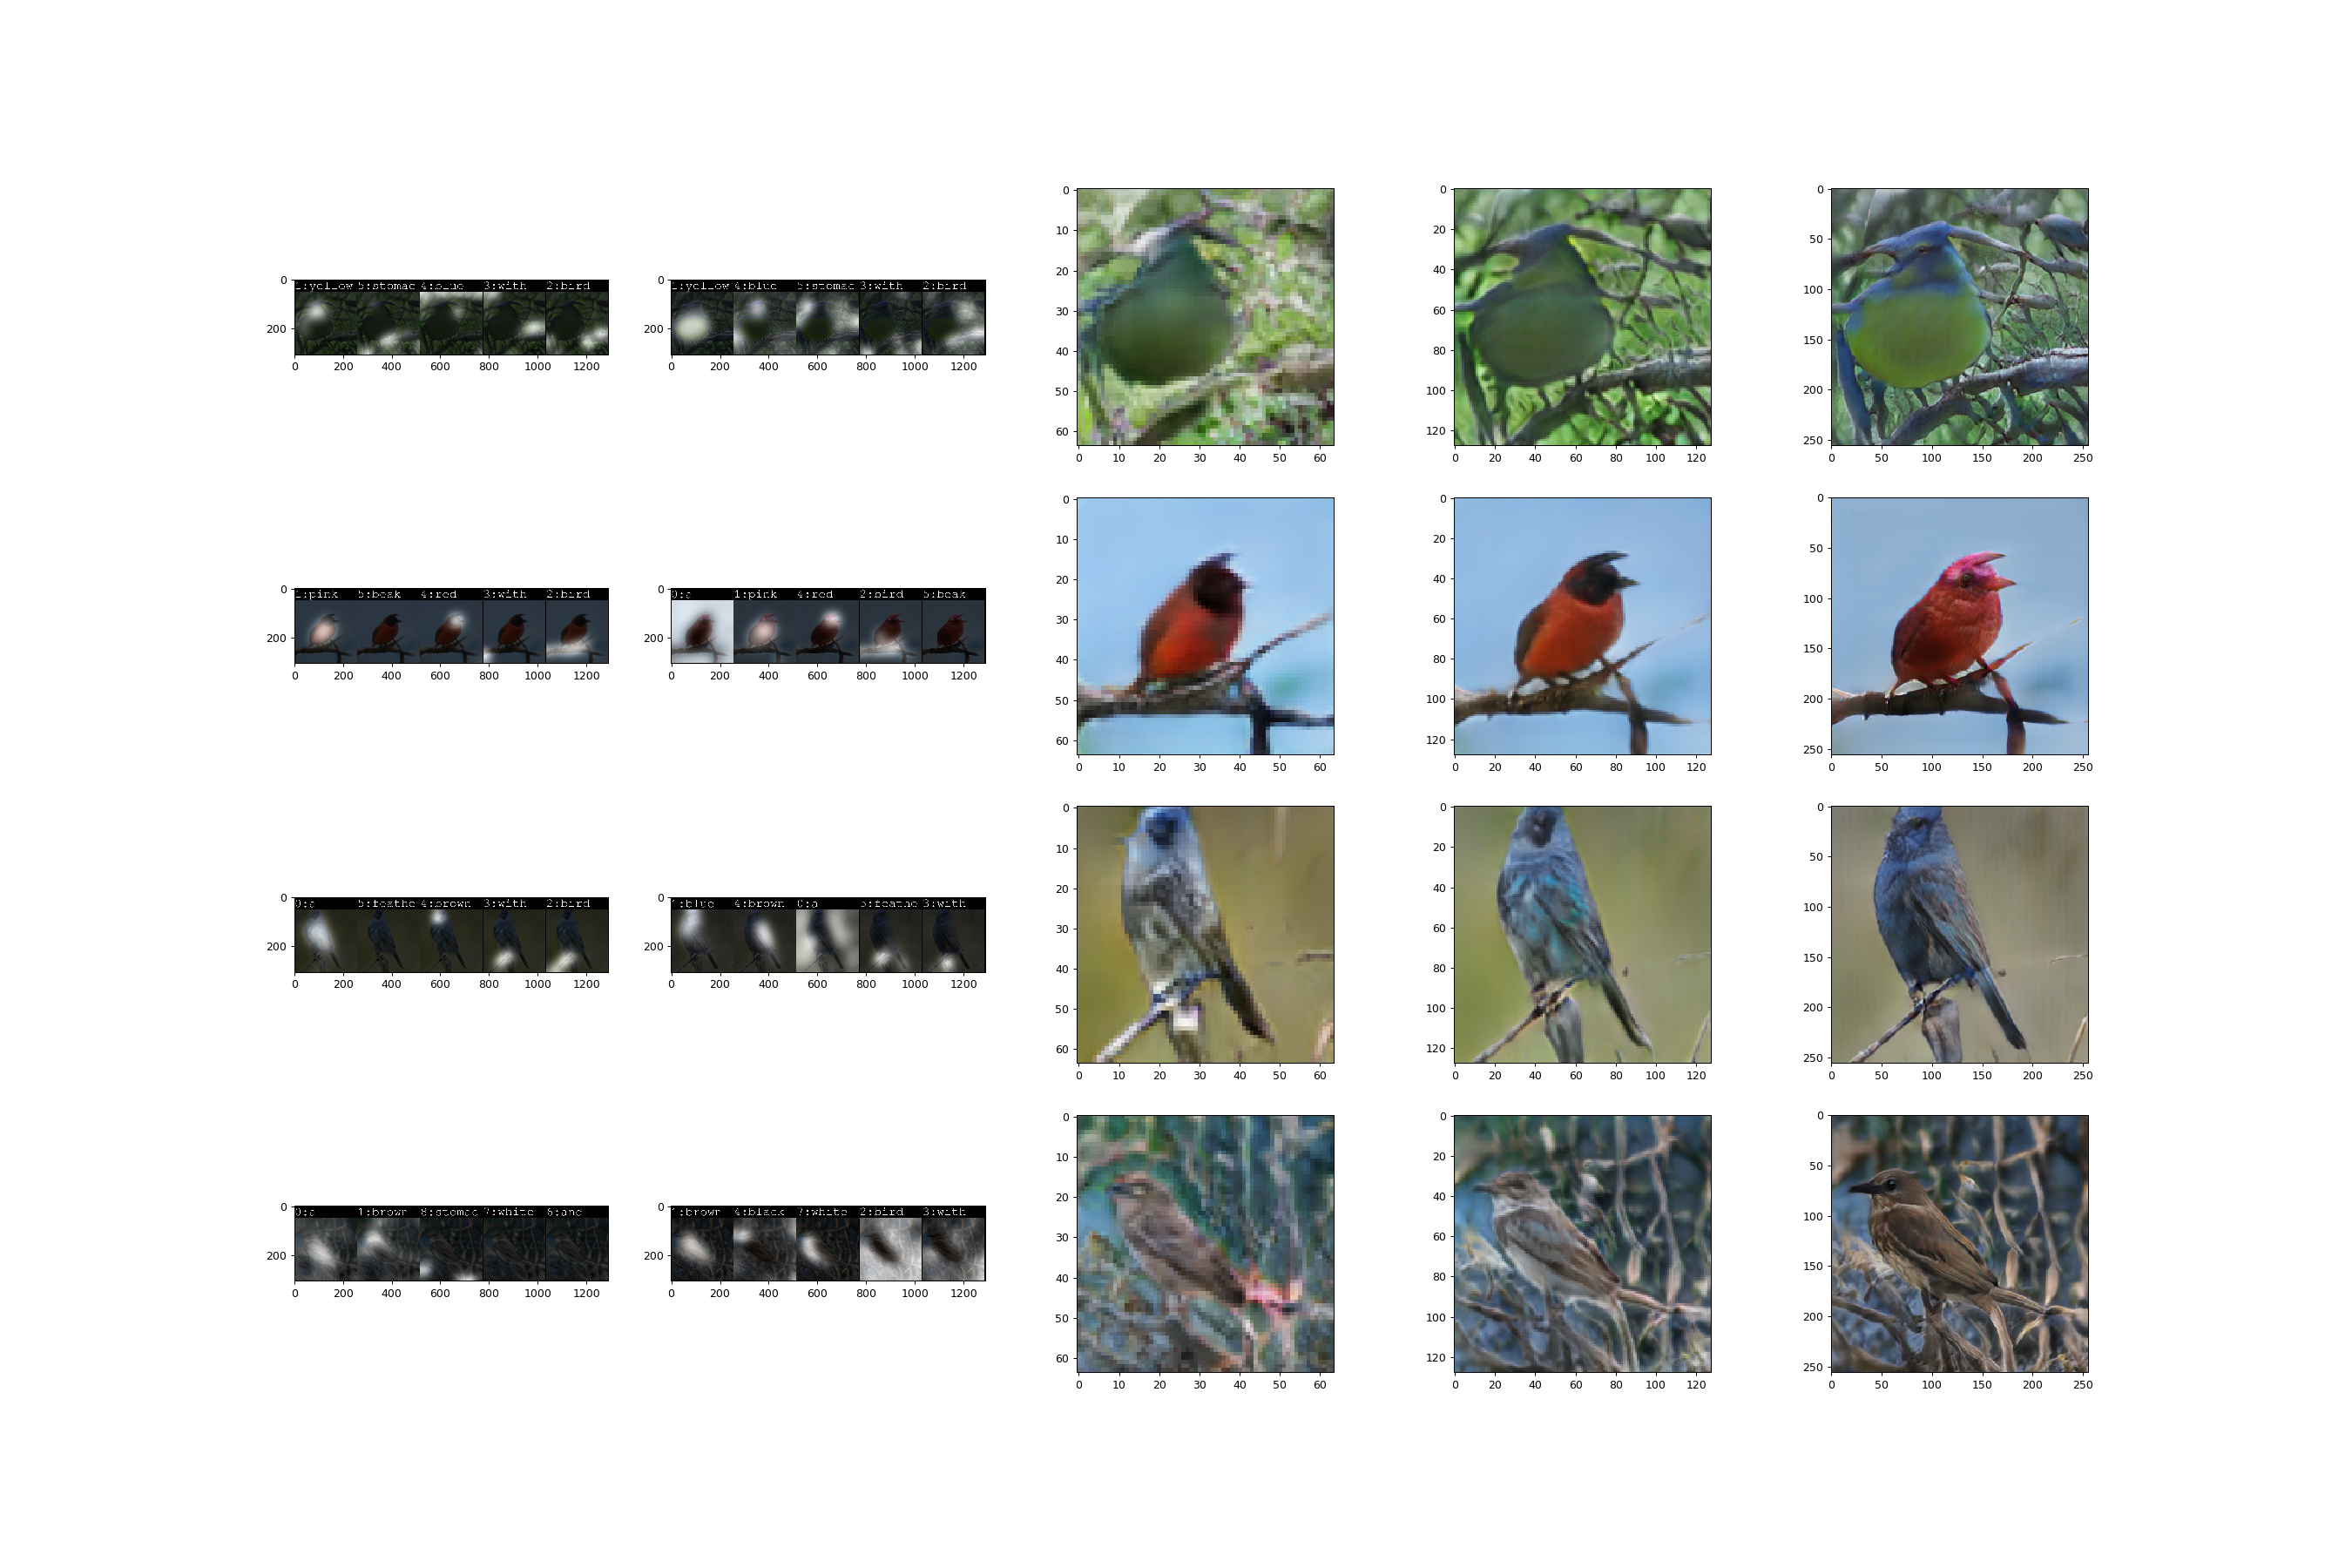

In [11]:
matplotlib.use('nbagg')
rows = len(sentences_birds)
plot(DATA_BIRD, sent=sentences_birds, size=(30,5*rows))

# COCO

### Write and call the coco model

In [ ]:
clean_dir(DATA_COCO)
write_to_examples(COCO, sentences=sentence_coco)
subprocess.Popen(COCO_CMD)

### Plot the COCO Generated Images

['a pizza with lots of cheese\n', 'an old red tv console\n', 'a black ship\n']


<IPython.core.display.Javascript object>


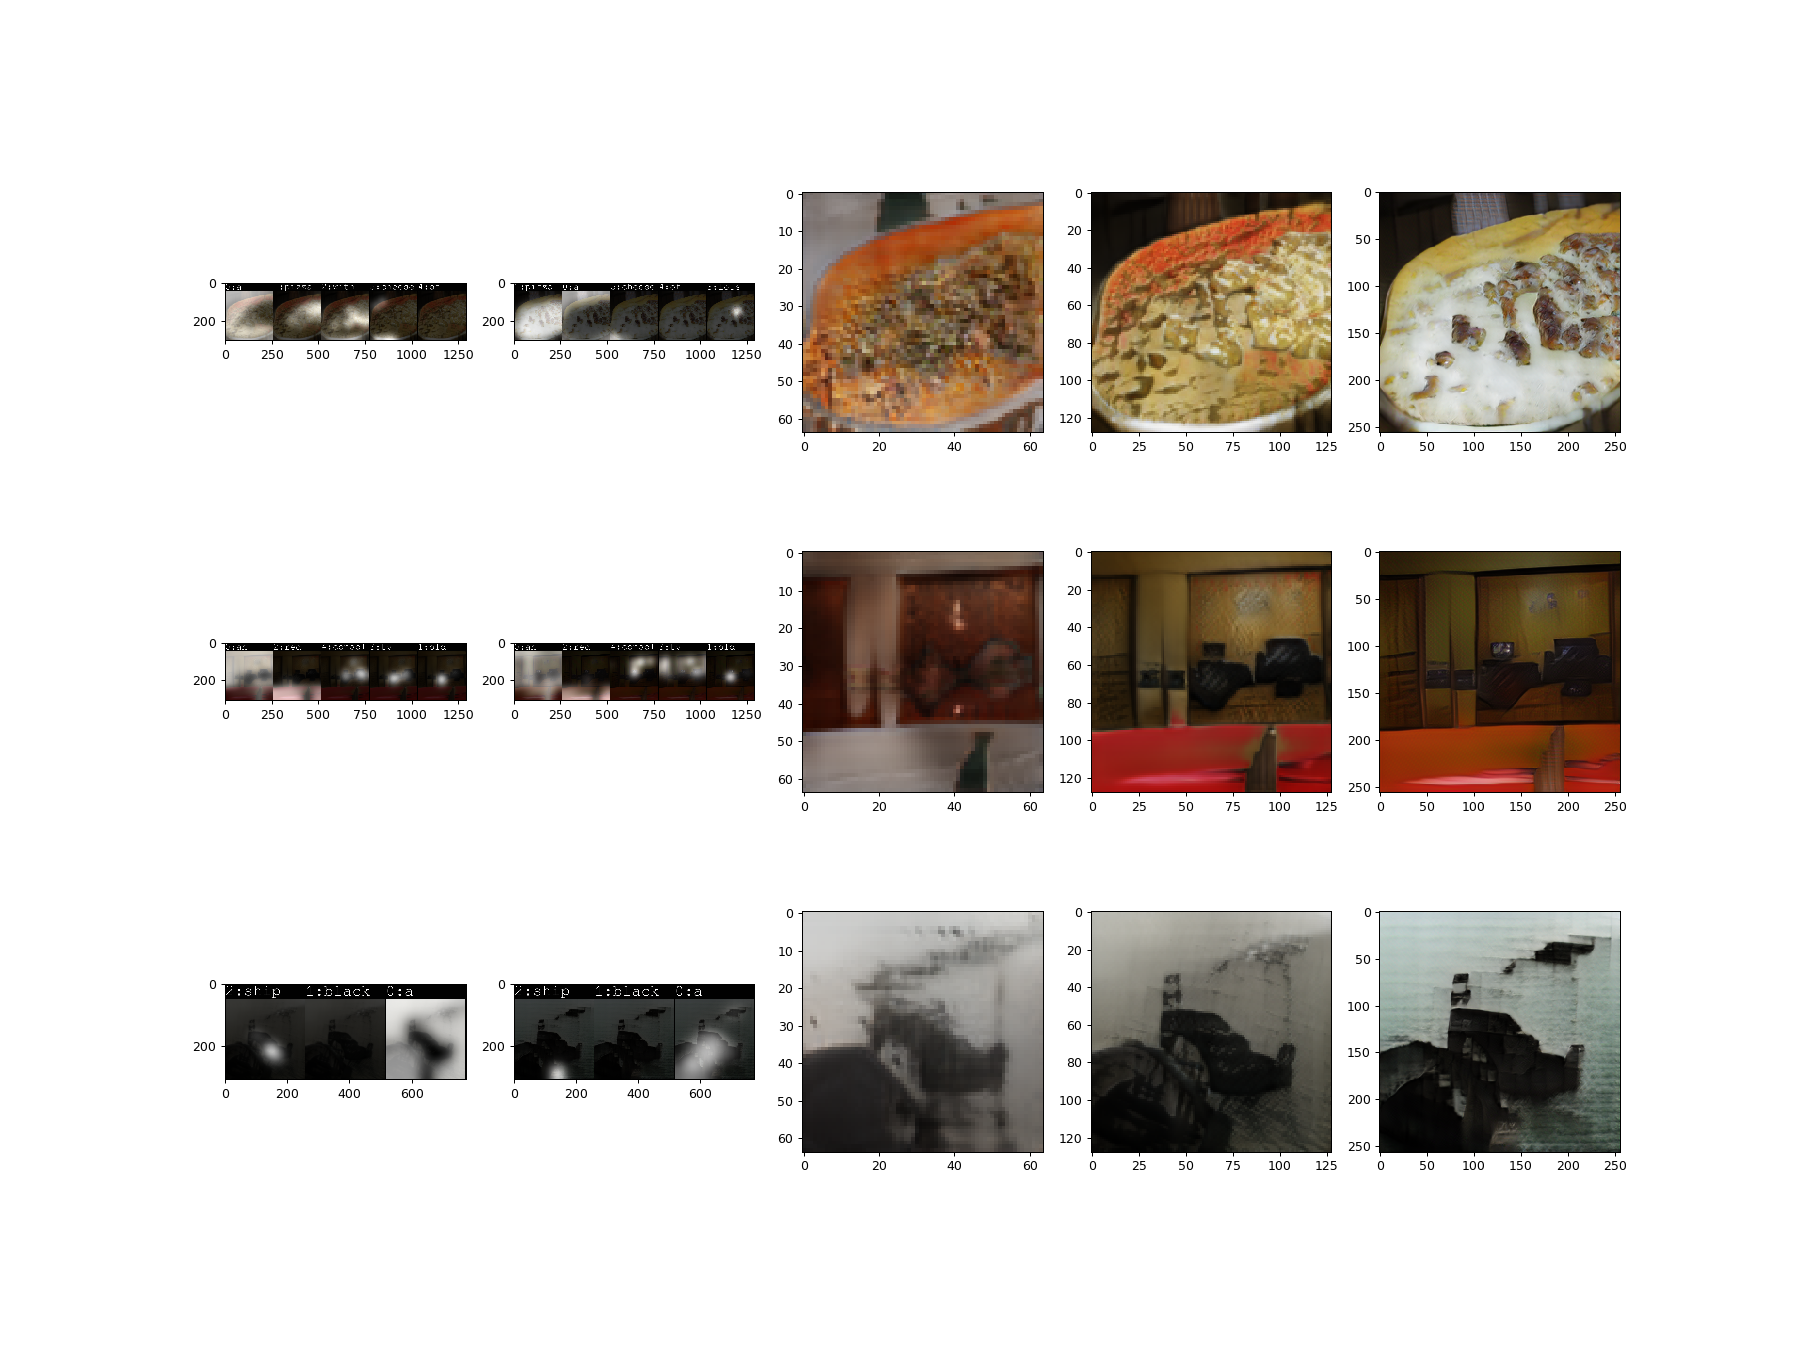

In [12]:
matplotlib.use('nbagg')
rows = len(sentence_coco)
plot(DATA_COCO, sent= sentence_coco, size=(20,5*rows))